In [73]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
import numpy as np

import skimage
import scipy

from skimage.morphology import watershed, disk, black_tophat, white_tophat
from skimage import data
from skimage.filters import rank
from skimage.util import img_as_ubyte
from skimage.feature import peak_local_max
from skimage import measure
from skimage import filters
from skimage import morphology
from skimage.color import rgb2gray
from scipy import ndimage


In [110]:
def thresholdImage(picture):
    imageThreshold = filters.threshold_yen(picture)
    imageArray = picture > imageThreshold
    return imageArray

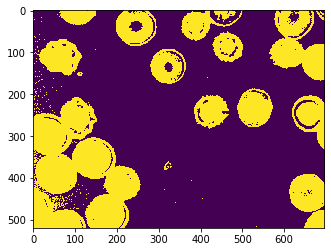

In [93]:
image = skimage.io.imread('/Users/reganlamoureux/UVM-2019-05-30-15-45-12 Malaria 2x dilution/Malaria_5Slices_sl5_ch1_p101_t1.tif')
image = rgb2gray(image)
thresholded_image = thresholdImage(image)
b_tophat = morphology.black_tophat(thresholded_image, disk(5))
distance = ndi.distance_transform_edt(b_tophat)
plt.imshow(thresholded_image)

In [55]:
def watershed_segmentation(image):
    image = img_as_ubyte(image)

    denoised = rank.median(image, disk(2))
    # find continuous region (low gradient -
    # where less than 10 for this image) --> markers
    # disk(5) is used here to get a more smooth image
    markers = rank.gradient(denoised, disk(2))<10
    markers = ndi.label(markers)[0]

    # local gradient (disk(2) is used to keep edges thin)
    gradient = rank.gradient(denoised, disk(2))

    # process the watershed
    labels = watershed(gradient, markers)
    return labels



/Users/reganlamoureux/miniconda3/envs/my_environment/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


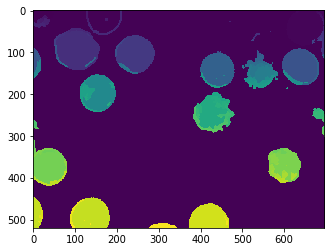

In [56]:
image = skimage.io.imread('/Users/reganlamoureux/UVM-2019-05-30-15-45-12 Malaria 2x dilution/Malaria_5Slices_sl5_ch1_p168_t1.tif')
watershed = watershed_segmentation(image)
plt.imshow(watershed)


In [68]:
denoised = rank.median(image, disk(2))
# find continuous region (low gradient -
# where less than 10 for this image) --> markers
# disk(5) is used here to get a more smooth image
markers = rank.gradient(denoised, disk(2))
# markers = ndi.label(markers)[0]
print(np.unique(markers))


[    8    12    16 ... 28365 28709 29153]


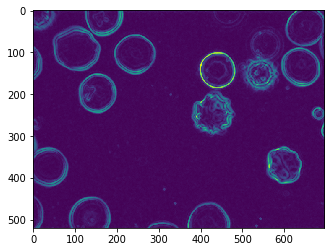

In [69]:
plt.imshow(markers)

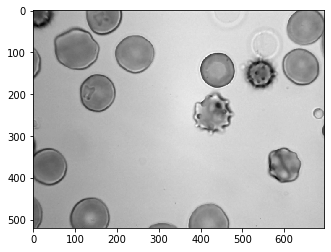

In [64]:
plt.imshow(denoised, cmap='gray')

In [10]:
def connected_component_labels(image_array):
    filled_image = ndi.binary_fill_holes(image_array)
    label_image = measure.label(image_array, background=0, return_num=True)
    plt.figure(figsize=(36, 14))
    ax = plt.subplot(131)
    ax.imshow(image_array, cmap='gray')
    ax.axis('off')
    
    ax2 = plt.subplot(132)
    ax2.imshow(label_image[0], cmap='nipy_spectral')

    
    counter = 0
    for cell in measure.regionprops(label_image[0]):
        if cell.area>1000:
            center_of_mass_y, center_of_mass_x = cell.centroid
            ax2.scatter(center_of_mass_x, center_of_mass_y, c='red')
        counter = counter + 1
    new_count = 0
    '''while new_count<6:
        img = skimage.morphology.erosion(label_image[0])
        label_image = measure.label(img, background=0, return_num=True)
        new_count +=1
    ''' 
        
    ax2 = plt.subplot(132)
    ax2.imshow(label_image[0], cmap='nipy_spectral')
    
    plt.tight_layout()
    plt.show()

    return label_image[0]

In [ ]:
image = skimage.io.imread('/Users/reganlamoureux/watershed_cropped/watershed_cropped_original_image_16943.png', flatten=True)
image = rgb2gray(image)
#lab_img = connected_component_labels(image)
thresholded_image = thresholdImage(image)
label_image = skimage.morphology.remove_small_holes(thresholded_image,
                                                    area_threshold=625)
label_image = skimage.morphology.remove_small_objects(thresholded_image,
                                                    min_size=100)
connected = connected_component_labels(thresholded_image)
plt.imshow(label_image, cmap='nipy_spectral')

In [ ]:
my_image = skimage.io.imread('/Users/reganlamoureux/watershed_cropped/watershed_cropped_original_image_16931.png', flatten=True)
my_image = np.asarray(my_image)
print(type(my_image))
#thresholded_image = thresholdImage(my_image)
b_tophat = morphology.black_tophat(image, disk(5))
watershed_image = watershed_segmentation(b_tophat)
connected_component_labels(watershed_image)

In [ ]:
image = skimage.io.imread('/Users/reganlamoureux/watershed_cropped/watershed_cropped_original_image_16931.png')
image = rgb2gray(image)
b_tophat = morphology.black_tophat(image, disk(5))
watershed_image = watershed_segmentation(b_tophat)
plt.imshow(watershed_image, cmap='gray')

In [11]:
def other_water(image):
    # Now we want to separate the two objects in image
    # Generate the markers as local maxima of the distance to the background
    distance = ndi.distance_transform_edt(image)
    local_maxi = peak_local_max(image, indices=False)
    markers = ndi.label(local_maxi)[0]
    labels = watershed(image, markers)

    fig, axes = plt.subplots(ncols=4, figsize=(36, 18), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
    ax[0].set_title('Overlapping objects')
    ax[1].imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
    ax[1].set_title('Distances')
    ax[2].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest')
    ax[2].set_title('Separated objects')

    for a in ax:
        a.set_axis_off()

    fig.tight_layout()
    plt.show()

In [ ]:
image = skimage.io.imread('Malaria_5Slices_sl1_ch1_p1_t1.tif')
#image = rgb2gray(image)
#b_tophat = morphology.black_tophat(image, disk(4))
thresholded_image = thresholdImage(image)
label_image = skimage.morphology.remove_small_holes(thresholded_image,
                                                    area_threshold=625)
label_image = skimage.morphology.remove_small_objects(label_image,
                                                    min_size=100)
#labeled_image = connected_component_labels(image)
other_water(label_image)

In [ ]:
image = skimage.io.imread('/Users/reganlamoureux/watershed_cropped/watershed_cropped_original_image_16931.png')
image = rgb2gray(image)
b_tophat = morphology.black_tophat(image, disk(5))
dist = ndimage.morphology.distance_transform_edt(b_tophat)
plt.imshow(dist)

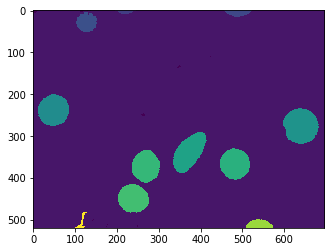

In [12]:
image = skimage.io.imread('/Users/reganlamoureux/UVM-2019-05-30-15-45-12 Malaria 2x dilution/Malaria_5Slices_sl5_ch1_p152_t1.tif')
#/Users/reganlamoureux/UVM-2019-05-30-15-45-12 Malaria 2x dilution/Malaria_5Slices_sl5_ch1_p22_t1.tif
b_tophat = morphology.black_tophat(image, disk(4))
thresholded_image = thresholdImage(b_tophat)
#b_tophat = morphology.black_tophat(thresholded_image, disk(4))
#close = morphology.binary_closing(thresholded_image)
#filled_image = ndi.binary_fill_holes(thresholded_image)

distance = ndi.distance_transform_edt(thresholded_image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=image)
#print(local_maxi)

markers = ndi.label(local_maxi)[0]
#markers = morphology.closing(markers)
                            
#labels = measure.label(thresholded_image)
labels = watershed(thresholded_image, markers)
label_image = skimage.morphology.remove_small_objects(labels,
                                                          min_size=100)
plt.imshow(label_image)

In [ ]:
plt.imshow(label_image==2)
c_idx, r_idx = np.where(label_image > 0)
print(len(c_idx))

In [ ]:
image = skimage.io.imread('/Users/reganlamoureux/UVM-2019-05-30-15-45-12 Malaria 2x dilution/Malaria_5Slices_sl5_ch1_p119_t1.tif')
#b_tophat = morphology.black_tophat(image, disk(4))
thresholded_image = thresholdImage(image)
close = morphology.binary_closing(thresholded_image)
filled_image = ndi.binary_fill_holes(close)


distance = ndi.distance_transform_edt(filled_image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=image)

markers = ndi.label(local_maxi)[0]
markers = morphology.closing(markers)

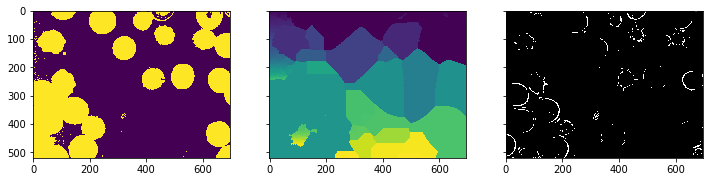

In [140]:
image = skimage.io.imread('/Users/reganlamoureux/UVM-2019-05-30-15-45-12 Malaria 2x dilution/Malaria_5Slices_sl5_ch1_p101_t1.tif')
#/Users/reganlamoureux/UVM-2019-05-30-15-45-12 Malaria 2x dilution/Malaria_5Slices_sl5_ch1_p22_t1.tif
b_tophat = morphology.white_tophat(image, disk(4))
thresholded_image = thresholdImage(b_tophat)
#b_tophat = morphology.black_tophat(thresholded_image, disk(4))
#closed_img = morphology.closing(thresholded_image)
erode = morphology.erosion(thresholded_image)
filled_image = ndi.binary_fill_holes(close)


distance = ndi.distance_transform_edt(filled_image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=image)
#print(local_maxi)

markers = ndi.label(local_maxi)[0]
#markers = morphology.closing(markers)
                            
labels = measure.label(filled_image)
labels = watershed(-distance, markers)
label_image = skimage.morphology.remove_small_holes(thresholded_image,
                                                    area_threshold=625)
label_image = skimage.morphology.remove_small_objects(labels,
                                                          min_size=100)
fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True)
fig.set_size_inches(12, 12)

ax[0].imshow(filled_image)
ax[1].imshow(labels)
ax[2].imshow(thresholded_image, cmap='gray')
#plt.imsave('/Users/reganlamoureux/testImage.png', label_image)

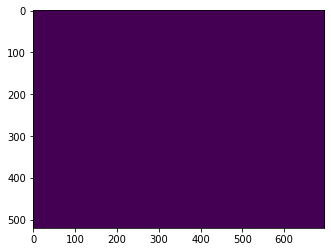

In [138]:
img = skimage.io.imread('/Users/reganlamoureux/UVM-2019-05-30-15-45-12 Malaria 2x dilution/Malaria_5Slices_sl1_ch1_p173_t1.tif')
#thresholded_image = thresholdImage(img)
#erosion = morphology.erosion(thresholded_image)
#counter = 0
#while counter<5:
    #erosion = morphology.erosion(erosion)
    #counter += 1
distance = ndi.distance_transform_edt(img)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=image)
markers = ndi.label(local_maxi)[0]

#labels = measure.label(filled_image)
labels = watershed(-distance, markers)

plt.imshow(labels)

In [ ]:
skimage.filters.threshold_otsu()

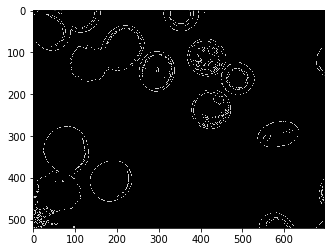

In [90]:
img = skimage.io.imread('/Users/reganlamoureux/UVM-2019-05-30-15-45-12 Malaria 2x dilution/Malaria_5Slices_sl5_ch1_p52_t1.tif')
thresh = skimage.filters.threshold_li(img)
binary = img < thresh
filled_image = ndi.binary_fill_holes(binary)
label_image = skimage.morphology.remove_small_holes(label_image,
                                                    area_threshold=625)
opening = morphology.binary_opening(binary)
sure_bg = morphology.dilation(opening)
dist = scipy.ndimage.distance_transform_edt(binary)

fg_thresh = skimage.filters.threshold_otsu(opening)

sure_fg = opening > fg_thresh

sure_fg = np.uint8(sure_fg)

sure_bg = np.uint8(sure_bg)

unknown = sure_bg - sure_fg

markers = skimage.measure.label(sure_fg)

markers = markers + 1

markers[unknown==255]=0
markers = skimage.morphology.watershed(img, markers)
#img[markers==-1]=[255,0,0]
plt.imshow(unknown, cmap='nipy_spectral')

In [ ]:
Malaria_5Slices_sl1_ch1_p70_t1.tif

In [94]:
import numpy as np
import cv2

from matplotlib import pyplot as plt

img = cv2.imread('/Users/reganlamoureux/UVM-2019-05-30-15-45-12 Malaria 2x dilution/Malaria_5Slices_sl1_ch1_p70_t1.tif')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)


kernel = np.ones((3,3),np.uint8)
filled = ndi.binary_fill_holes(thresh)
filled = np.uint8(filled)

# sure background area
sure_bg = cv2.dilate(filled,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(filled,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==1] = 0
markers = cv2.watershed(img, markers)
img[markers == -1] = [255,0,0]